In [24]:
# Import Dependencies
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime
from citipy import citipy

from config import weather_api_key

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
#len(cities)

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | maningrida
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | dicabisagan
Processing Record 6 of Set 1 | najran
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | rey bouba
Processing Record 9 of Set 1 | coahuayana
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | acapulco
Processing Record 13 of Set 1 | bushehr
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | rawson
Processing Record 16 of Set 1 | marau
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | gejiu
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Se

City not found. Skipping...
Processing Record 36 of Set 4 | mahanoro
Processing Record 37 of Set 4 | bambanglipuro
Processing Record 38 of Set 4 | atar
Processing Record 39 of Set 4 | puerto pinasco
City not found. Skipping...
Processing Record 40 of Set 4 | havelock
Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | mahibadhoo
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | kununurra
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | orje
Processing Record 49 of Set 4 | evensk
Processing Record 50 of Set 4 | faya
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | juazeiro
Processing Record 3 of Set 5 | buala
Processing Record 4 of Set 5 | petrozavodsk
Processing Record 5 of Set 5 | cuamba
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | port elizabeth
Processing Re

Processing Record 24 of Set 8 | goba
Processing Record 25 of Set 8 | ampanihy
Processing Record 26 of Set 8 | luderitz
Processing Record 27 of Set 8 | retz
Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | bowen
Processing Record 30 of Set 8 | buckeye
Processing Record 31 of Set 8 | kalmunai
Processing Record 32 of Set 8 | bichena
Processing Record 33 of Set 8 | campbell river
Processing Record 34 of Set 8 | mogzon
Processing Record 35 of Set 8 | natal
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | aguimes
Processing Record 38 of Set 8 | hirara
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | itirucu
Processing Record 41 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 42 of Set 8 | domoni
Processing Record 43 of Set 8 | matagami
Processing Record 44 of Set 8 | isangel
Processing Record 45 of Set 8 | churapcha
Processing Record 46 of Set 8 | porto recanati
Processing Record 47 of Set 8 | sis

Processing Record 11 of Set 12 | hay river
Processing Record 12 of Set 12 | shihezi
Processing Record 13 of Set 12 | tungkang
City not found. Skipping...
Processing Record 14 of Set 12 | neiafu
Processing Record 15 of Set 12 | rodrigues alves
Processing Record 16 of Set 12 | port moresby
Processing Record 17 of Set 12 | mali
Processing Record 18 of Set 12 | half moon bay
Processing Record 19 of Set 12 | auki
Processing Record 20 of Set 12 | xuddur
Processing Record 21 of Set 12 | el vigia
Processing Record 22 of Set 12 | bontang
Processing Record 23 of Set 12 | kharp
Processing Record 24 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 12 | la plata
Processing Record 26 of Set 12 | gunnedah
Processing Record 27 of Set 12 | waingapu
Processing Record 28 of Set 12 | marzuq
Processing Record 29 of Set 12 | pasni
Processing Record 30 of Set 12 | suksun
Processing Record 31 of Set 12 | agadez
Processing Record 32 of Set 12 | hovd
Processing Record 33 of Set 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = [ "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-03-16 04:35:02,28.0170,-97.5169,66.15,55,0,7.31
1,Rikitea,PF,2022-03-16 04:35:02,-23.1203,-134.9692,80.04,76,57,14.16
2,Maningrida,AU,2022-03-16 04:35:02,-12.0667,134.2667,88.72,64,89,7.96
3,Vaini,TO,2022-03-16 04:35:03,-21.2000,-175.2000,81.73,74,98,4.90
4,Dicabisagan,PH,2022-03-16 04:35:03,17.0818,122.4157,82.67,76,78,4.45
5,Najran,SA,2022-03-16 04:33:12,17.4924,44.1277,68.65,57,1,7.43
6,Rey Bouba,CM,2022-03-16 04:35:04,8.6724,14.1786,74.19,20,3,1.52
7,Coahuayana,MX,2022-03-16 04:35:04,18.7333,-103.6833,69.64,75,0,2.48
8,Namibe,AO,2022-03-16 04:35:05,-15.1961,12.1522,69.53,81,15,1.97
9,Acapulco,MX,2022-03-16 04:33:11,16.8634,-99.8901,76.82,88,0,5.75


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Scatter Plots

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
#plt.show()
plt.close()

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
#plt.show()
plt.close()

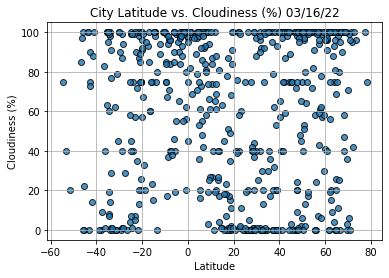

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()
plt.close()

### Linear Regressions

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Max Temp Regression

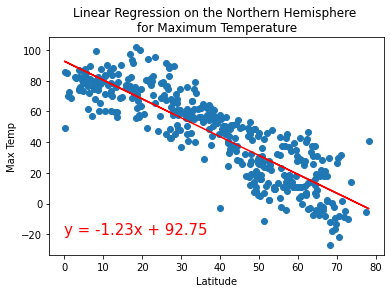

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                        'for Maximum Temperature', 'Max Temp',(0,-20))
                        

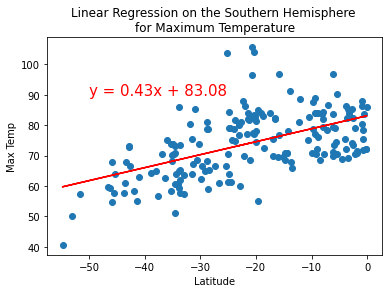

-0.7590444753769936

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

### Max Humitity Regression

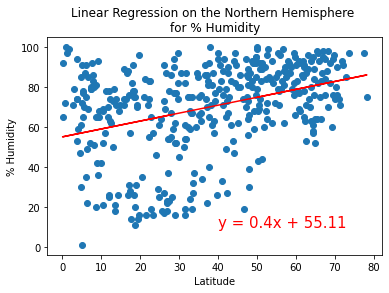

-0.7590444753769936

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

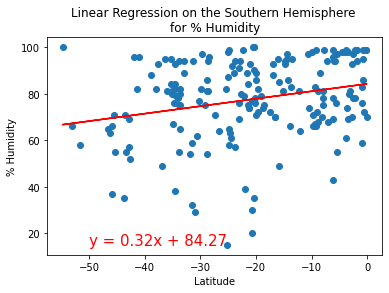

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

### Cloudiness Regression

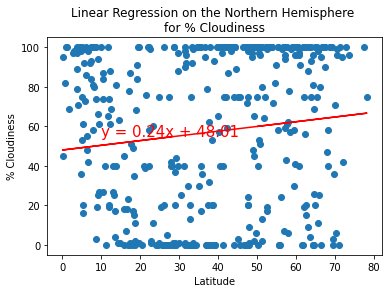

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n'
                    'for % Cloudiness', '% Cloudiness',(10,55))

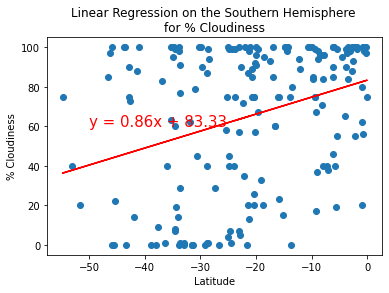

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

### Wind Speed Regression

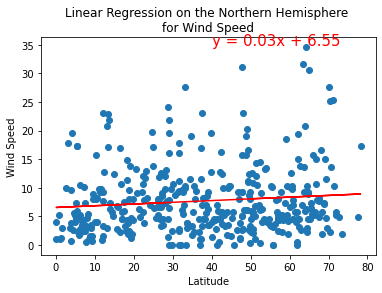

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

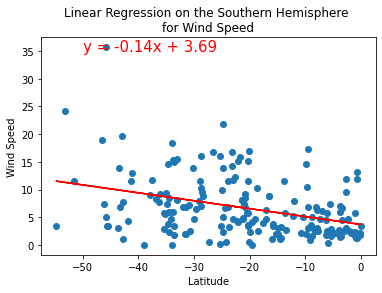

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))

In [78]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [79]:
r_value

-0.7590444753769936